# Machine Learning ASG2, Ambrish Krishna Muralitharan, S10223486G<a id="top"></a>

## Table of Contents
   
### 1.	[HR Analytics](#part1) 
   - [1.1 Load Data](#part1.1)
   - [1.2 Build Classification Models](#part1.2)
   - [1.3 Evaluate and Improve the Model(s) Performance](#part1.3)
       - [1.3.1 Logistic Regression](#part1.3.1)

       - [1.3.2 Gradient Boosting Classification](#part1.3.2)

       - [1.3.3 Decision Tree Classifier](#part1.3.3)

       - [1.3.4 Random Forest Classifier](#part1.3.4)

       - [1.3.5 XGBoost Classifier](#part1.3.5)


### 2.  [AirBnb](#part2)
   - [2.1 Load Data](#part2.1)
   - [2.2 Build Classification Models](#part2.2)
   - [2.3 Evaluate and Improve the Model(s) Performance](#part2.3)
        - [2.3.1 Linear Regression](#part2.3.1)

        - [2.3.2 Decision Tree Regressor](#part2.3.2)

        - [2.3.3 Random Forest Regressor](#part2.3.3)
        
        - [2.3.4 XGBoost Regressor](#part2.3.4)

In [203]:
# import the required packages

#Basic
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

#Q-Q plots
import scipy.stats as stats

#Warnings
import warnings
warnings.filterwarnings('ignore')

#Train Test Split
from sklearn.model_selection import train_test_split

#Model Scores
from sklearn import metrics
from sklearn.metrics import f1_score,recall_score,accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#Regression Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#Hyper-parameter Tuning
from sklearn.model_selection import GridSearchCV,cross_validate,validation_curve

## 1. HR Analytics<a id="part1"></a>
[Back to top](#top)

### 1.1 Load and Sample the data<a id="part1.1"></a>
[Back to top](#top)

In [204]:
hr_x = pd.read_csv('./hr_data_x.csv')
hr_x.head()

,Unnamed: 0,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Sales & Marketing,...,gender_m,recruitment_channel_sourcing,recruitment_channel_other,recruitment_channel_referred,avg_score_binned_40-50,avg_score_binned_50-60,avg_score_binned_60-70,avg_score_binned_80-90,avg_score_binned_70-80,avg_score_binned_90-100
0,0,0.448163,-0.402832,0.054106,1.175104,-0.665623,0.983006,-0.267859,-1.174075,1.601899,...,-1.511625,1.168478,-1.109906,-0.161041,2.251715,-0.56663,-0.482663,-0.49712,-0.419484,-0.242371
1,1,0.858341,-0.402832,-0.214370,1.175104,0.058003,0.983006,-0.267859,-1.105435,1.601899,...,0.661540,1.168478,-1.109906,-0.161041,-0.444106,1.76482,-0.482663,-0.49712,-0.419484,-0.242371
2,2,-0.936203,-0.402832,2.067679,0.319732,2.711297,0.983006,-0.267859,-1.379994,1.601899,...,0.661540,-0.855814,0.900977,-0.161041,2.251715,-0.56663,-0.482663,-0.49712,-0.419484,-0.242371
3,3,1.727412,-0.402832,-1.019799,0.295238,-1.148040,0.983006,3.733310,-0.624956,-0.624259,...,0.661540,-0.855814,0.900977,-0.161041,-0.444106,1.76482,-0.482663,-0.49712,-0.419484,-0.242371
4,4,-0.987923,-0.402832,-1.019799,-0.305534,-1.148040,-1.017287,-0.267859,-0.419037,1.601899,...,0.661540,1.168478,-1.109906,-0.161041,-0.444106,-0.56663,2.071839,-0.49712,-0.419484,-0.242371


In [205]:
hr_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 66 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    9336 non-null   int64  
 1   employee_id                   9336 non-null   float64
 2   no_of_trainings               9336 non-null   float64
 3   age                           9336 non-null   float64
 4   previous_year_rating          9336 non-null   float64
 5   length_of_service             9336 non-null   float64
 6   KPIs_met >80%                 9336 non-null   float64
 7   awards_won?                   9336 non-null   float64
 8   avg_training_score            9336 non-null   float64
 9   department_Sales & Marketing  9336 non-null   float64
 10  department_Finance            9336 non-null   float64
 11  department_Analytics          9336 non-null   float64
 12  department_Technology         9336 non-null   float64
 13  dep

In [206]:
hr_x = hr_x.drop('Unnamed: 0',axis=1)

In [207]:
hr_y = pd.read_csv('./hr_data_y.csv')
hr_y = hr_y.drop('Unnamed: 0',axis=1)
hr_y.head()

,is_promoted
0,1
1,1
2,1
3,1
4,1


In [208]:
#Data has already been stratified
hr_y.value_counts()

is_promoted
0              4668
1              4668
dtype: int64

In [209]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(hr_x, hr_y, test_size=0.3, random_state=2)

### 1.2 Build the Model(s)<a id="part1.2"></a>
[Back to top](#top)

In [210]:
#Logistic Regression
lg = LogisticRegression(solver='lbfgs', # optimization solver
                        max_iter=10000) # maximum iterations: set a big number to make sure the optimization solver will
# run enough iterations to let the model converge
lg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [211]:
#GradientBoostClassifier
gbc = GradientBoostingClassifier(max_depth=10,random_state=2)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=10, random_state=2)

In [212]:
#Decision Tree
dt = tree.DecisionTreeClassifier(max_depth = 10, random_state = 2)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=2)

In [213]:
#RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=10)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=10)

In [216]:
#XGBoostClassifier
xgb = XGBClassifier(n_estimators=20, learning_rate=0.1, use_label_encoder= False, eval_metric='logloss')
xgb.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

### 1.3 Evaluate and Improve the Model(s)<a id="part1.3"></a>
[Back to top](#top)

### 1.3.1 Logistic Regression<a id="part1.3.1"></a>
[Back to top](#top)

In [217]:
#Logistic Regression

print('training accuracy is: ', lg.score(X_train,y_train))
print('testing accuracy is: ', lg.score(X_test,y_test))

training accuracy is:  0.7964804896710023
testing accuracy is:  0.79400214209211


In [218]:
scores = cross_validate(
   lg,
    hr_x,
    hr_y,
    cv=5,
    scoring=['accuracy'],
    verbose=2
)
print('Avg Test score: ',np.mean(scores['test_accuracy']))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END .................................................... total time=   0.0s
Avg Test score:  0.7892039009552821


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [219]:
# Grid Search
param_grid = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

import warnings
warnings.filterwarnings('ignore')

gs = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
lg = LogisticRegression()

gs = gs.fit(hr_x, hr_y)

print(gs.best_score_)
print(gs.best_params_)
#print(gs.cv_results_)

0.7907032317187165
{'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [220]:
lg = LogisticRegression(solver='liblinear', # optimization solver
                        C=100,
                       penalty='l1') # maximum iterations: set a big number to make sure the optimization solver will
# run enough iterations to let the model converge
lg.fit(X_train, y_train)

print('----Final Logistic Regression Model----')
print('training accuracy is: ', lg.score(X_train,y_train))
print('testing accuracy is: ', lg.score(X_test,y_test))

----Final Logistic Regression Model----
training accuracy is:  0.7967865340474368
testing accuracy is:  0.79400214209211


### 1.3.2 GradientBoostingClassifier<a id="part1.3.2"></a>
[Back to top](#top)

In [221]:
#GradientBoostingClassifier

print('training accuracy is: ', gbc.score(X_train,y_train))
print('testing accuracy is: ', gbc.score(X_test,y_test))

training accuracy is:  0.991583779648049
testing accuracy is:  0.7936451267404498


In [222]:
scores = cross_validate(
    gbc,
    hr_x,
    hr_y,
    cv=5,
    scoring=['accuracy'],
    verbose=2
)
print('Avg Test score: ',np.mean(scores['test_accuracy']))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   5.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV] END .................................................... total time=   5.7s
[CV] END .................................................... total time=   5.5s
[CV] END .................................................... total time=   5.6s
[CV] END .................................................... total time=   5.4s
Avg Test score:  0.802378169698207


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.4s finished


In [223]:
param_grid = { "max_depth": [2, 4, 6, 8], 
              "min_samples_leaf" : [1, 5, 10], 
              "n_estimators": [10, 20, 50, 100]}

import warnings
warnings.filterwarnings('ignore')

gs = GridSearchCV(estimator=gbc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gbc = GradientBoostingClassifier()

gs = gs.fit(hr_x, hr_y)

print(gs.best_score_)
print(gs.best_params_)
#print(gs.cv_results_)

0.8149111870891822
{'max_depth': 4, 'min_samples_leaf': 5, 'n_estimators': 100}


In [224]:
gbc = GradientBoostingClassifier(max_depth=4, min_samples_leaf=1, n_estimators=100)
gbc.fit(X_train, y_train)

print('----Final GradientBoostingClassifier Model----')
print('training accuracy is: ', gbc.score(X_train,y_train))
print('testing accuracy is: ', gbc.score(X_test,y_test))

----Final GradientBoostingClassifier Model----
training accuracy is:  0.8512624330527927
testing accuracy is:  0.8161370938950375


### 1.3.3 DecisionTreeClassifier<a id="part1.3.3"></a>
[Back to top](#top)

In [225]:
#DecisionTreeClassifier

print('training accuracy is: ', dt.score(X_train,y_train))
print('testing accuracy is: ', dt.score(X_test,y_test))

training accuracy is:  0.8437643458301454
testing accuracy is:  0.7954302034987505


In [226]:
scores = cross_validate(
    dt,
    hr_x,
    hr_y,
    cv=5,
    scoring=['accuracy'],
    verbose=2
)
print('Avg Test score: ',np.mean(scores['test_accuracy']))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Avg Test score:  0.8021643810163909


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [227]:
param_grid = { "max_depth": np.arange(1,40), 
              'criterion':['entropy','gini']}

import warnings
warnings.filterwarnings('ignore')

gs = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
dt = tree.DecisionTreeClassifier()

gs = gs.fit(hr_x, hr_y)

print(gs.best_score_)
print(gs.best_params_)
#print(gs.cv_results_)

0.8042002479673445
{'criterion': 'entropy', 'max_depth': 11}


In [228]:
dt = tree.DecisionTreeClassifier(max_depth = 11, criterion = 'entropy')
dt.fit(X_train, y_train)

print('----Final DecisionTreeClassifier Model----')
print('training accuracy is: ', dt.score(X_train,y_train))
print('testing accuracy is: ', dt.score(X_test,y_test))

----Final DecisionTreeClassifier Model----
training accuracy is:  0.848814078041316
testing accuracy is:  0.8036415565869333


### 1.3.4 RandomForestClassifier<a id="part1.3.4"></a>
[Back to top](#top)

In [229]:
#RandomForestClassifier

print('training accuracy is: ', rf.score(X_train,y_train))
print('testing accuracy is: ', rf.score(X_test,y_test))

training accuracy is:  0.8322876817138485
testing accuracy is:  0.7843627275972866


In [230]:
scores = cross_validate(
   rf,
    hr_x,
    hr_y,
    cv=5,
    scoring=['accuracy'],
    verbose=2
)
print('Avg Test score: ',np.mean(scores['test_accuracy']))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Avg Test score:  0.7792423691547892


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [231]:
param_grid = { "max_depth": np.arange(1,40), 
              'criterion':['entropy','gini']}

import warnings
warnings.filterwarnings('ignore')

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
rf = RandomForestClassifier()

gs = gs.fit(hr_x, hr_y)

print(gs.best_score_)
print(gs.best_params_)
#print(gs.cv_results_)

0.7984158533941821
{'criterion': 'entropy', 'max_depth': 16}


In [232]:
rf = RandomForestClassifier(criterion = 'gini', max_depth = 17)
rf.fit(X_train, y_train)

print('----Final RandomForestClassifier Model----')
print('training accuracy is: ', rf.score(X_train,y_train))
print('testing accuracy is: ', rf.score(X_test,y_test))

----Final RandomForestClassifier Model----
training accuracy is:  0.9499617444529457
testing accuracy is:  0.8093538022134952


### 1.3.5 XGBoostClassifier<a id="part1.3.5"></a>
[Back to top](#top)

In [241]:
#XGBoostClassifier

print('training accuracy is: ', xgb.score(X_train,y_train))
print('testing accuracy is: ', xgb.score(X_test,y_test))

training accuracy is:  0.8249426166794185
testing accuracy is:  0.8186362013566584


In [242]:
scores = cross_validate(
   xgb,
    hr_x,
    hr_y,
    cv=5,
    scoring=['accuracy'],
    verbose=2
)
print('Avg Test score: ',np.mean(scores['test_accuracy']))

[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Avg Test score:  0.8059129086385995


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [243]:
param_grid = {'max_depth': range (2, 10, 1),
              'n_estimators': range(60, 220, 40),
              'learning_rate': [0.1, 0.01, 0.05]
             }

import warnings
warnings.filterwarnings('ignore')

gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
xgb = XGBClassifier()

gs = gs.fit(hr_x, hr_y)

print(gs.best_score_)
print(gs.best_params_)
#print(gs.cv_results_)

0.8155540441501155
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 140}


In [244]:
xgb = XGBClassifier(n_estimators=140, learning_rate=0.1, max_depth = 4,  use_label_encoder= False, eval_metric='logloss')
xgb.fit(X_train, y_train)

print('----Final XGBClassifier Model----')
print('training accuracy is: ', xgb.score(X_train,y_train))
print('testing accuracy is: ', xgb.score(X_test,y_test))

----Final XGBClassifier Model----
training accuracy is:  0.8495791889824025
testing accuracy is:  0.8204212781149589


## 2. Airbnb<a id="part2"></a>
[Back to top](#top)

### 2.1 Load and Sample the data<a id="part2.1"></a>
[Back to top](#top)

In [245]:
listings = pd.read_csv('./listings_new1.csv')
print(listings.shape)

(4115, 16)


In [246]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,275343,1425,1439258,464,0,1,1.28875,103.80814,1,44,0.666667,18,605,0.065476,0.198718,0.906849
1,604966,1002,2996022,288,0,2,1.33171,103.79383,0,276,0.142857,11,275,0.035714,0.000000,0.991781
2,719944,1952,3648224,102,0,13,1.30901,103.79639,2,208,0.000000,0,730,NaN,0.000000,0.000000
3,782227,1503,4125828,410,0,13,1.28342,103.78585,1,128,0.095238,0,730,NaN,0.000000,1.000000
4,804470,3073,741873,203,0,18,1.30292,103.82253,0,2604,0.000000,1,0,0.000000,0.000000,0.000000


In [247]:
listings = listings.drop(['reviews_per_month'], axis = 1)

In [248]:
#plot histogram and Q-Q plots and box plot to have a look at the variable distribution and outliers
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

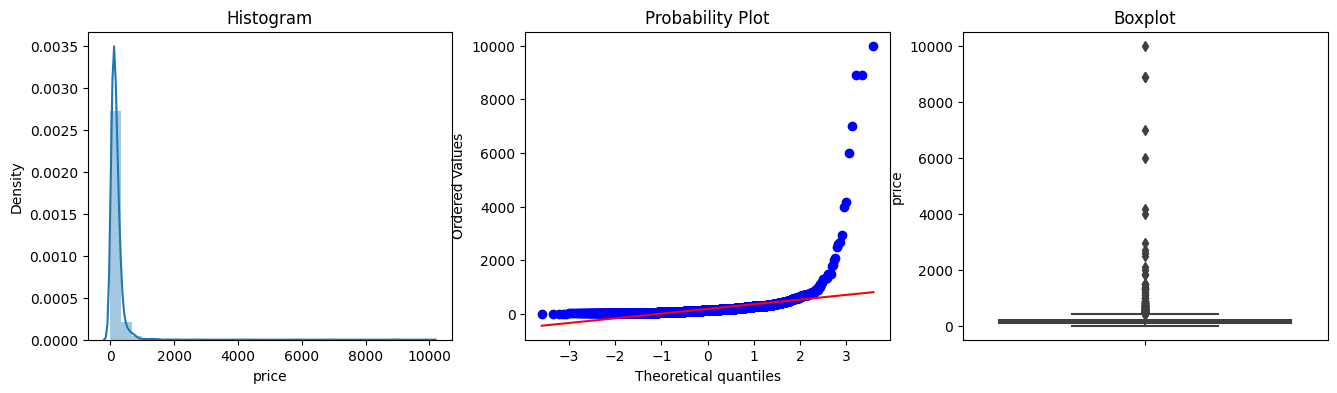

In [249]:
# Plot for the variable reviews_per_month which contains outliers
diagnostic_plots(listings, 'price')

In [250]:
def find_boundaries(df, variable):
    
    #calculate the boundaries outside 

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [251]:
# find the upper and lower boudaries for the variable minimum_nights, highlighting outliers

p_upper_boundary, p_lower_boundary = find_boundaries(listings, 'price')
p_upper_boundary, p_lower_boundary

(426.0, -126.0)

In [252]:
# Flag outliers in minimum_nights
p_outliers = np.where(listings['price'] > p_upper_boundary, True,
                    np.where(listings['price'] < p_lower_boundary, True, False))

In [253]:
# trim the dataset of outliers across multiple variables
listings = listings.loc[~(p_outliers), ] 
listings.shape 

(3894, 15)

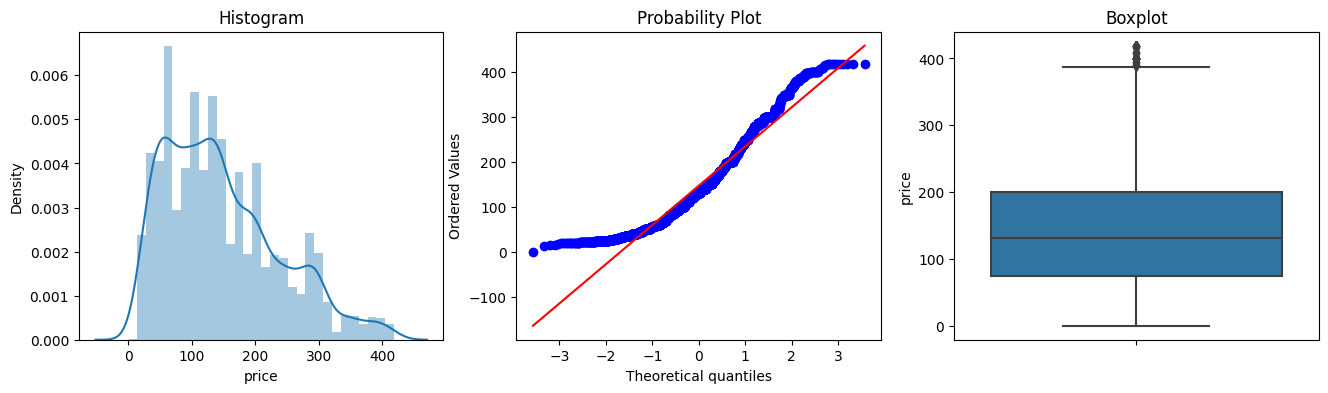

In [254]:
# Plot for the variable reviews_per_month which contains outliers
diagnostic_plots(listings, 'price')

In [255]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3894 entries, 0 to 4114
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3894 non-null   int64  
 1   name                            3894 non-null   int64  
 2   host_id                         3894 non-null   int64  
 3   host_name                       3894 non-null   int64  
 4   neighbourhood_group             3894 non-null   int64  
 5   neighbourhood                   3894 non-null   int64  
 6   latitude                        3894 non-null   float64
 7   longitude                       3894 non-null   float64
 8   room_type                       3894 non-null   int64  
 9   price                           3894 non-null   int64  
 10  minimum_nights                  3894 non-null   float64
 11  number_of_reviews               3894 non-null   int64  
 12  last_review                     38

In [256]:
#train test split
list_X = listings.drop('price',axis=1)
list_y = listings.price


X_train, X_test, y_train, y_test = train_test_split(list_X, list_y, test_size=0.3, random_state=2)

### 2.2 Build the Model(s)<a id="part2.2"></a>
[Back to top](#top)

In [257]:
#Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [258]:
#Decision Tree Regression
dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [259]:
#Random Forest Regression
rfr= RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [260]:
#Gradient Boost Regression
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [261]:
#XGBoost Regression
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### 2.3 Evaluate and Improve the Model(s)<a id="part2.3"></a>
[Back to top](#top)

### 2.3.1 Linear Regression<a id="part2.3.1"></a>
[Back to top](#top)

In [262]:
# Calculated the fitted values for training set
y_fitted = lm.predict(X_train)

# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print((mean_absolute_error(y_fitted, y_train)), '(Train MAE)') # RMSE: the lower the better
print(lm.score(X_train, y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

68.88932535652624 (Train RMSE)
52.15709779646205 (Train MAE)
0.4069035555734736 (Train R^2 Value)


In [263]:
# calculated the predicated value for testing data
y_pred = lm.predict(X_test)

# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print((mean_absolute_error(y_pred, y_test)), '(Test MAE)') # RMSE: the lower the better
print(lm.score(X_test, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

69.10089304054469 (Test RMSE)
52.21112000431832 (Test MAE)
0.42509035742726664 (Test R^2 Value)


In [264]:
scores = cross_validate(
   lm,
    list_X,
    list_y,
    cv=5,
    scoring=['r2'],
    verbose=2
)
print('Avg Test score: ',np.mean(scores['test_r2']))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Avg Test score:  0.3577338253144207


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [265]:
lm.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [266]:
param_grid = {'copy_X': [True, False],
              'fit_intercept': [True, False],
              'n_jobs': [None, 10, 20],
              #'normalize': 'deprecated',
              'positive': [True, False]
             }

import warnings
warnings.filterwarnings('ignore')

gs = GridSearchCV(estimator=lm, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
lm = LinearRegression()

gs = gs.fit(list_X, list_y)

print(gs.best_score_)
print(gs.best_params_)
#print(gs.cv_results_)

0.35845550185763253
{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}


In [267]:
lm= LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, positive=False)
lm.fit(X_train,y_train)

print('----Final Linear Regression Model----')
print('training accuracy is: ', lm.score(X_train,y_train))
print('testing accuracy is: ', lm.score(X_test,y_test))

----Final Linear Regression Model----
training accuracy is:  0.4068878713894635
testing accuracy is:  0.4249895916750194


### 2.3.2 Decision Tree Regression<a id="part2.3.2"></a>
[Back to top](#top)

In [268]:
# Calculated the fitted values for training set
y_fitted = dtr.predict(X_train)

# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print((mean_absolute_error(y_fitted, y_train)), '(Train MAE)') # RMSE: the lower the better
print(dtr.score(X_train, y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

0.0 (Train RMSE)
0.0 (Train MAE)
1.0 (Train R^2 Value)


In [269]:
# calculated the predicated value for testing data
y_pred = dtr.predict(X_test)

# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print((mean_absolute_error(y_pred, y_test)), '(Test MAE)') # RMSE: the lower the better
print(dtr.score(X_test, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

70.99163193617615 (Test RMSE)
45.26261762189906 (Test MAE)
0.3931985748964475 (Test R^2 Value)


In [270]:
scores = cross_validate(
   dtr,
    list_X,
    list_y,
    cv=5,
    scoring=['r2'],
    verbose=2
)
print('Avg Test score: ',np.mean(scores['test_r2']))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Avg Test score:  -0.006218581608356422


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [271]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [272]:
param_grid = {"max_depth": np.arange(1,40), 
              'criterion':['mse','gini'],
              "splitter":["best","random"],
              "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
              "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
              "max_features":["auto","log2","sqrt",None],
              "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
             }

import warnings
warnings.filterwarnings('ignore')

gs = GridSearchCV(estimator=dtr, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
dtr= DecisionTreeRegressor()

gs = gs.fit(list_X, list_y)

print(gs.best_score_)
print(gs.best_params_)
#print(gs.cv_results_)

0.33254284073290374
{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 90, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.1, 'splitter': 'random'}


In [273]:
dtr= DecisionTreeRegressor(criterion='mse', max_depth=7, max_features = 'auto', max_leaf_nodes = 50,
                           min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter='random')
dtr.fit(X_train,y_train)

print('----Final Decision Tree Regression Model----')
print('training accuracy is: ', dtr.score(X_train,y_train))
print('testing accuracy is: ', dtr.score(X_test,y_test))

----Final Decision Tree Regression Model----
training accuracy is:  0.31133782989607195
testing accuracy is:  0.3293933500448105


### 2.3.3 Random Forest Regressor<a id="part2.3.3"></a>
[Back to top](#top)

In [274]:
# Calculated the fitted values for training set
y_fitted = rfr.predict(X_train)

# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print((mean_absolute_error(y_fitted, y_train)), '(Train MAE)') # RMSE: the lower the better
print(rfr.score(X_train, y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

19.121075725947826 (Train RMSE)
13.099658715596332 (Train MAE)
0.9543073758993527 (Train R^2 Value)


In [275]:
# calculated the predicated value for testing data
y_pred = rfr.predict(X_test)

# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print((mean_absolute_error(y_pred, y_test)), '(Test MAE)') # RMSE: the lower the better
print(rfr.score(X_test, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

49.889370978320514 (Test RMSE)
34.500436270316506 (Test MAE)
0.7003265076326524 (Test R^2 Value)


In [276]:
scores = cross_validate(
   rfr,
    list_X,
    list_y,
    cv=5,
    scoring=['r2'],
    verbose=2
)
print('Avg Test score: ',np.mean(scores['test_r2']))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   1.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] END .................................................... total time=   1.9s
[CV] END .................................................... total time=   1.9s
[CV] END .................................................... total time=   1.8s
[CV] END .................................................... total time=   1.9s
Avg Test score:  0.4977624561179935


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished


In [277]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [278]:
param_grid = {'n_estimators' : [5,20,50,100], # number of trees in the random forest
              'max_features' : ['auto', 'sqrt'], # number of features in consideration at every split
              'max_depth' : np.arange(1,40), # maximum number of levels allowed in each decision tree
             }

import warnings
warnings.filterwarnings('ignore')

gs = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
rfr= RandomForestRegressor()

gs = gs.fit(list_X, list_y)

print(gs.best_score_)
print(gs.best_params_)
#print(gs.cv_results_)

0.50480345968158
{'max_depth': 29, 'max_features': 'auto', 'n_estimators': 100}


In [279]:
rfr= RandomForestRegressor(max_depth=18, max_features = 'auto', n_estimators = 100)
rfr.fit(X_train,y_train)

print('----Final Random Forest Regressor Model----')
print('training accuracy is: ', rfr.score(X_train,y_train))
print('testing accuracy is: ', rfr.score(X_test,y_test))


----Final Random Forest Regressor Model----
training accuracy is:  0.9525173250812982
testing accuracy is:  0.7006625335197709


### 2.3.4 XGBoost Regressor<a id="part2.3.4"></a>
[Back to top](#top)

In [286]:
# Calculated the fitted values for training set
y_fitted = xgbr.predict(X_train)

# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print((mean_absolute_error(y_fitted, y_train)), '(Train MAE)') # RMSE: the lower the better
print(xgbr.score(X_train, y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

12.453881019135816 (Train RMSE)
8.561725308829491 (Train MAE)
0.9806165587751946 (Train R^2 Value)


In [287]:
# calculated the predicated value for testing data
y_pred = xgbr.predict(X_test)

# Calculated the RMSE and R^2 for testing set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print((mean_absolute_error(y_pred, y_test)), '(Test MAE)') # RMSE: the lower the better
print(xgbr.score(X_test, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

50.860640517130385 (Test RMSE)
35.968491869772265 (Test MAE)
0.688544558443047 (Test R^2 Value)


In [288]:
scores = cross_validate(
   xgbr,
    list_X,
    list_y,
    cv=5,
    scoring=['r2'],
    verbose=2
)
print('Avg Test score: ',np.mean(scores['test_r2']))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
Avg Test score:  0.4658107461072348


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished


In [289]:
xgbr.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [290]:
param_grid = {'verbosity' : [1,5], # number of trees in the random forest
              'max_depth' : np.arange(1,40), # maximum number of levels allowed in each decision tree
              'learning_rate': [0.1, 0.01, 0.05],
              'gamma' : [1,9]
             }

import warnings
warnings.filterwarnings('ignore')

gs = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
xgbr= XGBRegressor()

gs = gs.fit(list_X, list_y)

print(gs.best_score_)
print(gs.best_params_)
#print(gs.cv_results_)

0.5045194173100181
{'gamma': 9, 'learning_rate': 0.05, 'max_depth': 8, 'verbosity': 1}


In [291]:
xgbr= XGBRegressor(gamma=9, learning_rate=0.05, verbosity=1,max_depth=8)
xgbr.fit(X_train,y_train)

print('----Gradient Boost Regressor Model----')
print('training accuracy is: ', xgbr.score(X_train,y_train))
print('testing accuracy is: ', xgbr.score(X_test,y_test))

----Gradient Boost Regressor Model----
training accuracy is:  0.9272450179230484
testing accuracy is:  0.6996432097607477
